In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from functions.import_dataset import *
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
x_train, y_train, x_test, y_test = imp_dataset("dataset/voice.csv")

In [3]:
svmm = svm.NuSVC(gamma="scale")
svmm.fit(x_train, y_train.ravel())

NuSVC()

In [4]:
svm_p_test = svmm.predict(x_test)
svm_acc= accuracy_score(y_test, svm_p_test)
print("Accuracy of SVM: ", svm_acc)
print("Classification Report: \n", classification_report(y_test, svm_p_test))

Accuracy of SVM:  0.9415481832543444
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       314
           1       0.97      0.91      0.94       319

    accuracy                           0.94       633
   macro avg       0.94      0.94      0.94       633
weighted avg       0.94      0.94      0.94       633



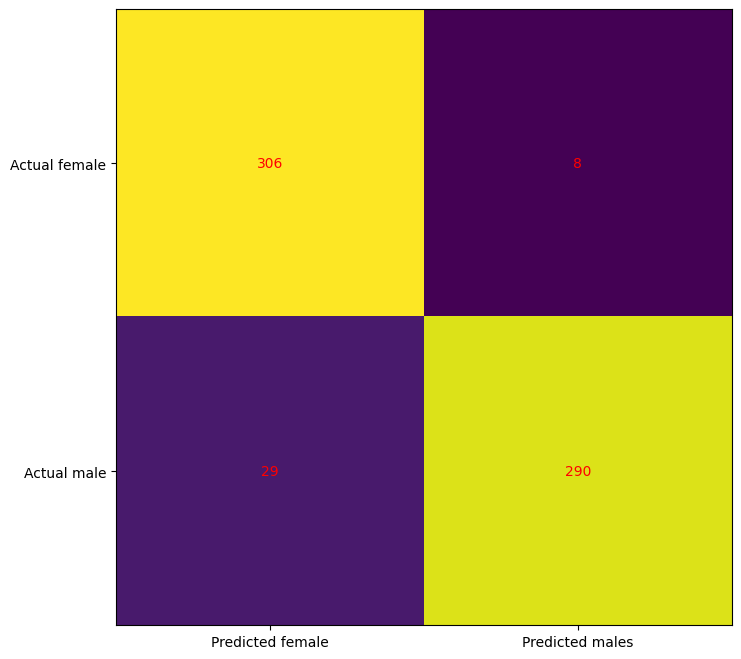

In [5]:
cm = confusion_matrix(y_test, svmm.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted female', 'Predicted males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual female', 'Actual male'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()